### 14. Apply LabelEncoder, OneHotEncoder, and OrdinalEncoder to a sample dataset and compare the resulting feature space dimensions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\user\\Downloads\\car 1.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [13]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
ord_enc = OrdinalEncoder()
cat = (df.dtypes == 'object')

list_cat = list(cat[cat].index)
df1 = df.copy()
df2 = df.copy()
## df1
## list_cat

## Ordinal encoding over the categorical features

df1[list_cat] = ord_enc.fit_transform(df[list_cat])
df2[list_cat] = ord_enc.transform(df[list_cat])
## df1.head()
df2.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4.0,1.0,2011,8.0,335.0,6.0,3.0,3.0,2.0,38.0,0.0,8.0,26,19,3916,46135
1,4.0,0.0,2011,8.0,300.0,6.0,3.0,3.0,2.0,67.0,0.0,6.0,28,19,3916,40650
2,4.0,0.0,2011,8.0,300.0,6.0,3.0,3.0,2.0,64.0,0.0,8.0,28,20,3916,36350
3,4.0,0.0,2011,8.0,230.0,6.0,3.0,3.0,2.0,67.0,0.0,8.0,28,18,3916,29450
4,4.0,0.0,2011,8.0,230.0,6.0,3.0,3.0,2.0,63.0,0.0,6.0,28,18,3916,34500


In [27]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
df3 = df.copy()
df4 = df.copy()
df3 = one_hot_encoder.fit_transform(df[list_cat])
df4[list_cat] = ord_enc.transform(df[list_cat])
df4
df3

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 95312 stored elements and shape (11914, 1074)>

In [28]:
df5 = df.copy()
df6 = df.copy()
one_hot_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)
df5 = pd.DataFrame(one_hot_encoder.fit_transform(df5[list_cat]))
df6 = pd.DataFrame(one_hot_encoder.fit_transform(df6[list_cat]))
## df5
df6

,0,1,2,3,4,5,6,7,8,9,...,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11910,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11911,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11912,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
OH_encoder = OneHotEncoder(handle_unknown= 'ignore', sparse_output = False)

In [33]:
one_hot_encoded_df = pd.get_dummies(df, columns = ['Make','Model','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style'])

In [34]:
one_hot_encoded_df

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Acura,Make_Alfa Romeo,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2011,300.0,6.0,2.0,28,19,3916,40650,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2011,300.0,6.0,2.0,28,20,3916,36350,False,False,...,False,False,True,False,False,False,False,False,False,False
3,2011,230.0,6.0,2.0,28,18,3916,29450,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2011,230.0,6.0,2.0,28,18,3916,34500,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120,True,False,...,False,False,False,False,False,False,False,False,False,False
11910,2012,300.0,6.0,4.0,23,16,204,56670,True,False,...,False,False,False,False,False,False,False,False,False,False
11911,2012,300.0,6.0,4.0,23,16,204,50620,True,False,...,False,False,False,False,False,False,False,False,False,False
11912,2013,300.0,6.0,4.0,23,16,204,50920,True,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
plt.

In [136]:
from sklearn.preprocessing import LabelEncoder

In [137]:
label_encoder = LabelEncoder()

In [ ]:
ord_enc = OrdinalEncoder()
cat = (df.dtypes == 'object')

list_cat = list(cat[cat].index)
df1 = df.copy()
df2 = df.copy()
## df1
## list_cat

## Ordinal encoding over the categorical features

df1[list_cat] = label_encoder.fit_transform(df[list_cat])
df2[list_cat] = label_encoder.transform(df[list_cat])
## df1.head()
df2.head()

### 15. Apply both StandardScaler and MinMaxScaler on any numerical dataset and visualize the difference using boxplots. 

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [39]:
df_dropped = df.drop(columns = ['Make','Model','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style'])

In [54]:
df_dropped

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120
11910,2012,300.0,6.0,4.0,23,16,204,56670
11911,2012,300.0,6.0,4.0,23,16,204,50620
11912,2013,300.0,6.0,4.0,23,16,204,50920


In [41]:
scalar_var = StandardScaler()
df_dropped_standard_scalar = scalar_var.fit_transform(df_dropped)

In [43]:
df_dropped_standard_scalar.dtype

dtype('float64')

In [45]:
df_dropped_standard_scalar

array([[ 8.12281285e-02,  7.84101819e-01,  2.08466480e-01, ...,
        -8.15868087e-02,  1.63760387e+00,  9.21739830e-02],
       [ 8.12281285e-02,  4.63551604e-01,  2.08466480e-01, ...,
        -8.15868087e-02,  1.63760387e+00,  9.19416262e-04],
       [ 8.12281285e-02,  4.63551604e-01,  2.08466480e-01, ...,
         2.96798166e-02,  1.63760387e+00, -7.06201711e-02],
       ...,
       [ 2.13164314e-01,  4.63551604e-01,  2.08466480e-01, ...,
        -4.15386685e-01, -9.36964931e-01,  1.66791436e-01],
       [ 3.45100500e-01,  4.63551604e-01,  2.08466480e-01, ...,
        -4.15386685e-01, -9.36964931e-01,  1.71782570e-01],
       [-5.78452800e-01, -2.59976025e-01,  2.08466480e-01, ...,
        -3.04120059e-01, -1.03614686e+00, -1.92986140e-01]])

In [47]:
df_dropped_standard_scalar = pd.DataFrame(df_dropped_standard_scalar, columns = df_dropped.columns)

In [48]:
df_dropped_standard_scalar.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,0.081228,0.784102,0.208466,-1.629557,-0.071930,-0.081587,1.637604,0.092174
1,0.081228,0.463552,0.208466,-1.629557,0.153737,-0.081587,1.637604,0.000919
2,0.081228,0.463552,0.208466,-1.629557,0.153737,0.029680,1.637604,-0.070620
3,0.081228,-0.177549,0.208466,-1.629557,0.153737,-0.192853,1.637604,-0.185416
4,0.081228,-0.177549,0.208466,-1.629557,0.153737,-0.192853,1.637604,-0.101399


In [50]:
## MixMaxScalar

In [51]:
scalar_minmax = MinMaxScaler()
df_dropped_minmax_scalar = pd.DataFrame(scalar_minmax.fit_transform(df_dropped), columns = df_dropped.columns)
df_dropped_minmax_scalar.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,0.777778,0.295983,0.375,0.0,0.040936,0.092308,0.692131,0.021384
1,0.777778,0.258985,0.375,0.0,0.046784,0.092308,0.692131,0.018727
2,0.777778,0.258985,0.375,0.0,0.046784,0.100000,0.692131,0.016643
3,0.777778,0.184989,0.375,0.0,0.046784,0.084615,0.692131,0.013300
4,0.777778,0.184989,0.375,0.0,0.046784,0.084615,0.692131,0.015747


### 16. Create equal-width and equal-frequency bins for an “Make” column in a dataset and visualize using histograms. 

In [82]:
# {Age : [18,22,25,30,35,40,45,50,55,60]}

abc1 = pd.DataFrame({'Age' : [18,22,25,30,35,40,45,50,55,60]})
## Equal Width
abc1['abc_width'] = pd.cut(abc['Age'], bins=4, labels = False)
abc1


,Age,abc_width
0,18,0
1,22,0
2,25,0
3,30,1
4,35,1
5,40,2
6,45,2
7,50,3
8,55,3
9,60,3


(array([[ 0.,  0.,  0.,  2.,  1.,  2.,  1.,  1.,  1.,  2.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <a list of 2 BarContainer objects>)

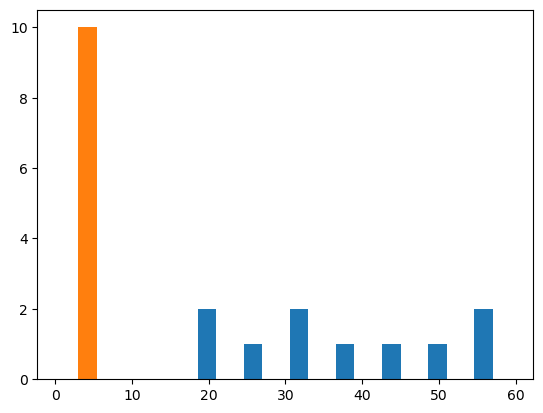

In [84]:
plt.hist(abc1)

In [58]:
df['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [78]:
abc = pd.DataFrame({'Age' : [18,22,25,30,35,40,45,50,55,60]})
## Equal Frequnecy
abc['abc_width'] = pd.qcut(abc['Age'], q=4, labels = False)
abc

,Age,abc_width
0,18,0
1,22,0
2,25,0
3,30,1
4,35,1
5,40,2
6,45,2
7,50,3
8,55,3
9,60,3


(array([[ 0.,  0.,  0.,  2.,  1.,  2.,  1.,  1.,  1.,  2.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <a list of 2 BarContainer objects>)

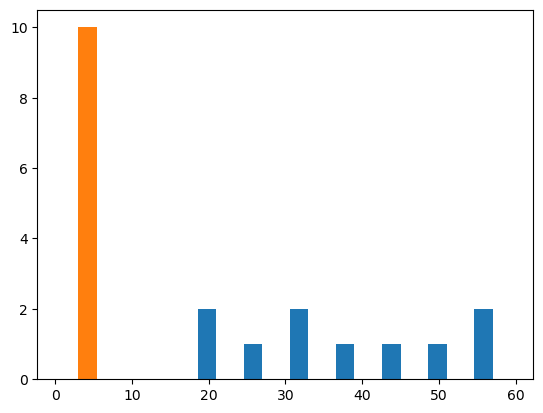

In [79]:
plt.hist(abc)

### 17. Create custom bins for a “Salary” column — for example: Low (<30K), Medium (30K–70K), High (>70K) — and encode them using OrdinalEncoder. 

In [85]:
{'Salary' : [18000,22000,25000,30000,35000,40000,65000,70000,95000,60000]}

{'Salary': [18000,
  22000,
  25000,
  30000,
  35000,
  40000,
  65000,
  70000,
  95000,
  60000]}

In [133]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Create DataFrame correctly
salary_data = {'Salary': [18000,22000,25000,30000,35000,40000,65000,70000,95000,60000]}
salary1 = pd.DataFrame(salary_data)

print("Salary DataFrame:")
print(salary1)

Salary DataFrame:
   Salary
0   18000
1   22000
2   25000
3   30000
4   35000
5   40000
6   65000
7   70000
8   95000
9   60000


In [134]:
# Create bins: Low (<30K), Medium (30K-70K), High (>70K)
bins = [0, 30000, 70000, float('inf')]
labels = ['Low', 'Medium', 'High']

# Bin the salaries
salary1['Salary_Category'] = pd.cut(salary1['Salary'], bins=bins, labels=labels, right=False)

In [135]:
# Encode using OrdinalEncoder
encoder = OrdinalEncoder(categories=[labels])
salary1['Salary_Encoded'] = encoder.fit_transform(salary1[['Salary_Category']])

print("\nFinal Result:")
print(salary1)


Final Result:
   Salary Salary_Category  Salary_Encoded
0   18000             Low             0.0
1   22000             Low             0.0
2   25000             Low             0.0
3   30000          Medium             1.0
4   35000          Medium             1.0
5   40000          Medium             1.0
6   65000          Medium             1.0
7   70000            High             2.0
8   95000            High             2.0
9   60000          Medium             1.0
